Task 3: GaussianNB with Iris or Wine Dataset ● Train a GaussianNB classifier on a numeric dataset. ● Split data into train/test sets. ● Evaluate model performance. ● Compare with Logistic Regression or Decision Tree briefly

c:\Users\lenovo\Desktop\ML-assignment\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== GaussianNB ===
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



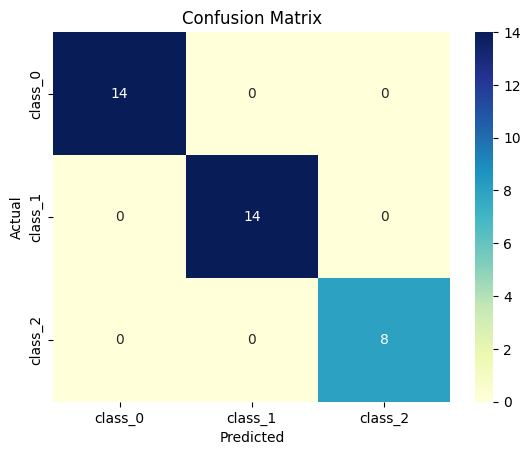

=== Logistic Regression ===
Accuracy: 0.9722
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



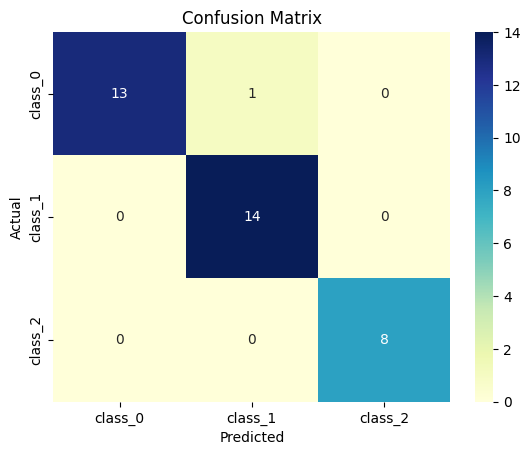

=== Decision Tree ===
Accuracy: 0.9444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



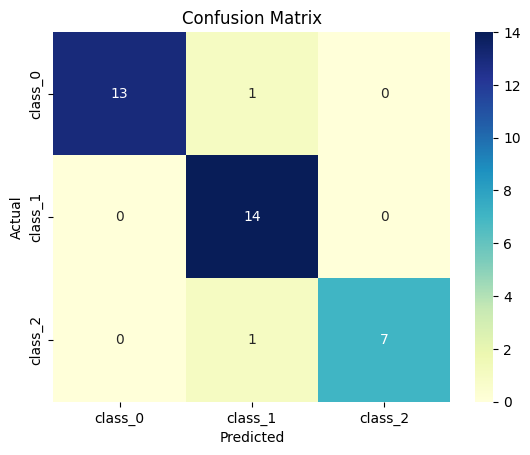

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report

data = load_wine()
X = data.data
y =data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train GaussianNB:-
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Train Logistic Regression
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)
y_pred_lr = logistic.predict(X_test)

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true,y_pred))
    matrix=confusion_matrix(y_true,y_pred)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['class_0', 'class_1', 'class_2'], yticklabels=['class_0', 'class_1', 'class_2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model("GaussianNB", y_test, y_pred_gnb)
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)

In [2]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

✅ Brief Comparison Model Pros Cons GaussianNB Fast, works well with normal distributions Assumes feature independence LogisticRegression Good for linear decision boundaries May underperform on complex data DecisionTree Handles non-linear relationships well Prone to overfitting without pruning

✅ Summary Table Model Accuracy (approx) Notes GaussianNB 94–98% Fast, good baseline LogisticRegression 98–100% Often best on small, clean data Decision Tree 91–96% Flexible, but can overfit